# Linear Regression Assignment
## BoomBikes

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company wants to know:
1. 
Which variables are significant in predicting the demand for shared bikes2. .
How well those variables describe the bike dmd a.n!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike Sharing dataset

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [403]:
# Read the data
bike = pd.read_csv("day.csv")

In [404]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of Bike Sharing data set

In [405]:

# Size of the Data set
bike.shape

(730, 16)

In [406]:
# description of data set
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [407]:
#Information about the data set columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [408]:
# Doing some EDA
#checking for null values
bike.isnull().sum()

# Not found any null data.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Preparation

In [409]:
# Data Trasformation

bike['season'] = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth']   = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weathersit'] = bike.weathersit.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Heavy Rain + Snow'})
bike['weekday'] = bike.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})


In [410]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data
#### Use pairplot to visualize the numeric variables

In [411]:
# select numeric variables
num_var = ['instant', 'temp', 'atemp', 'hum',  'windspeed', 'casual', 'registered', 'cnt']

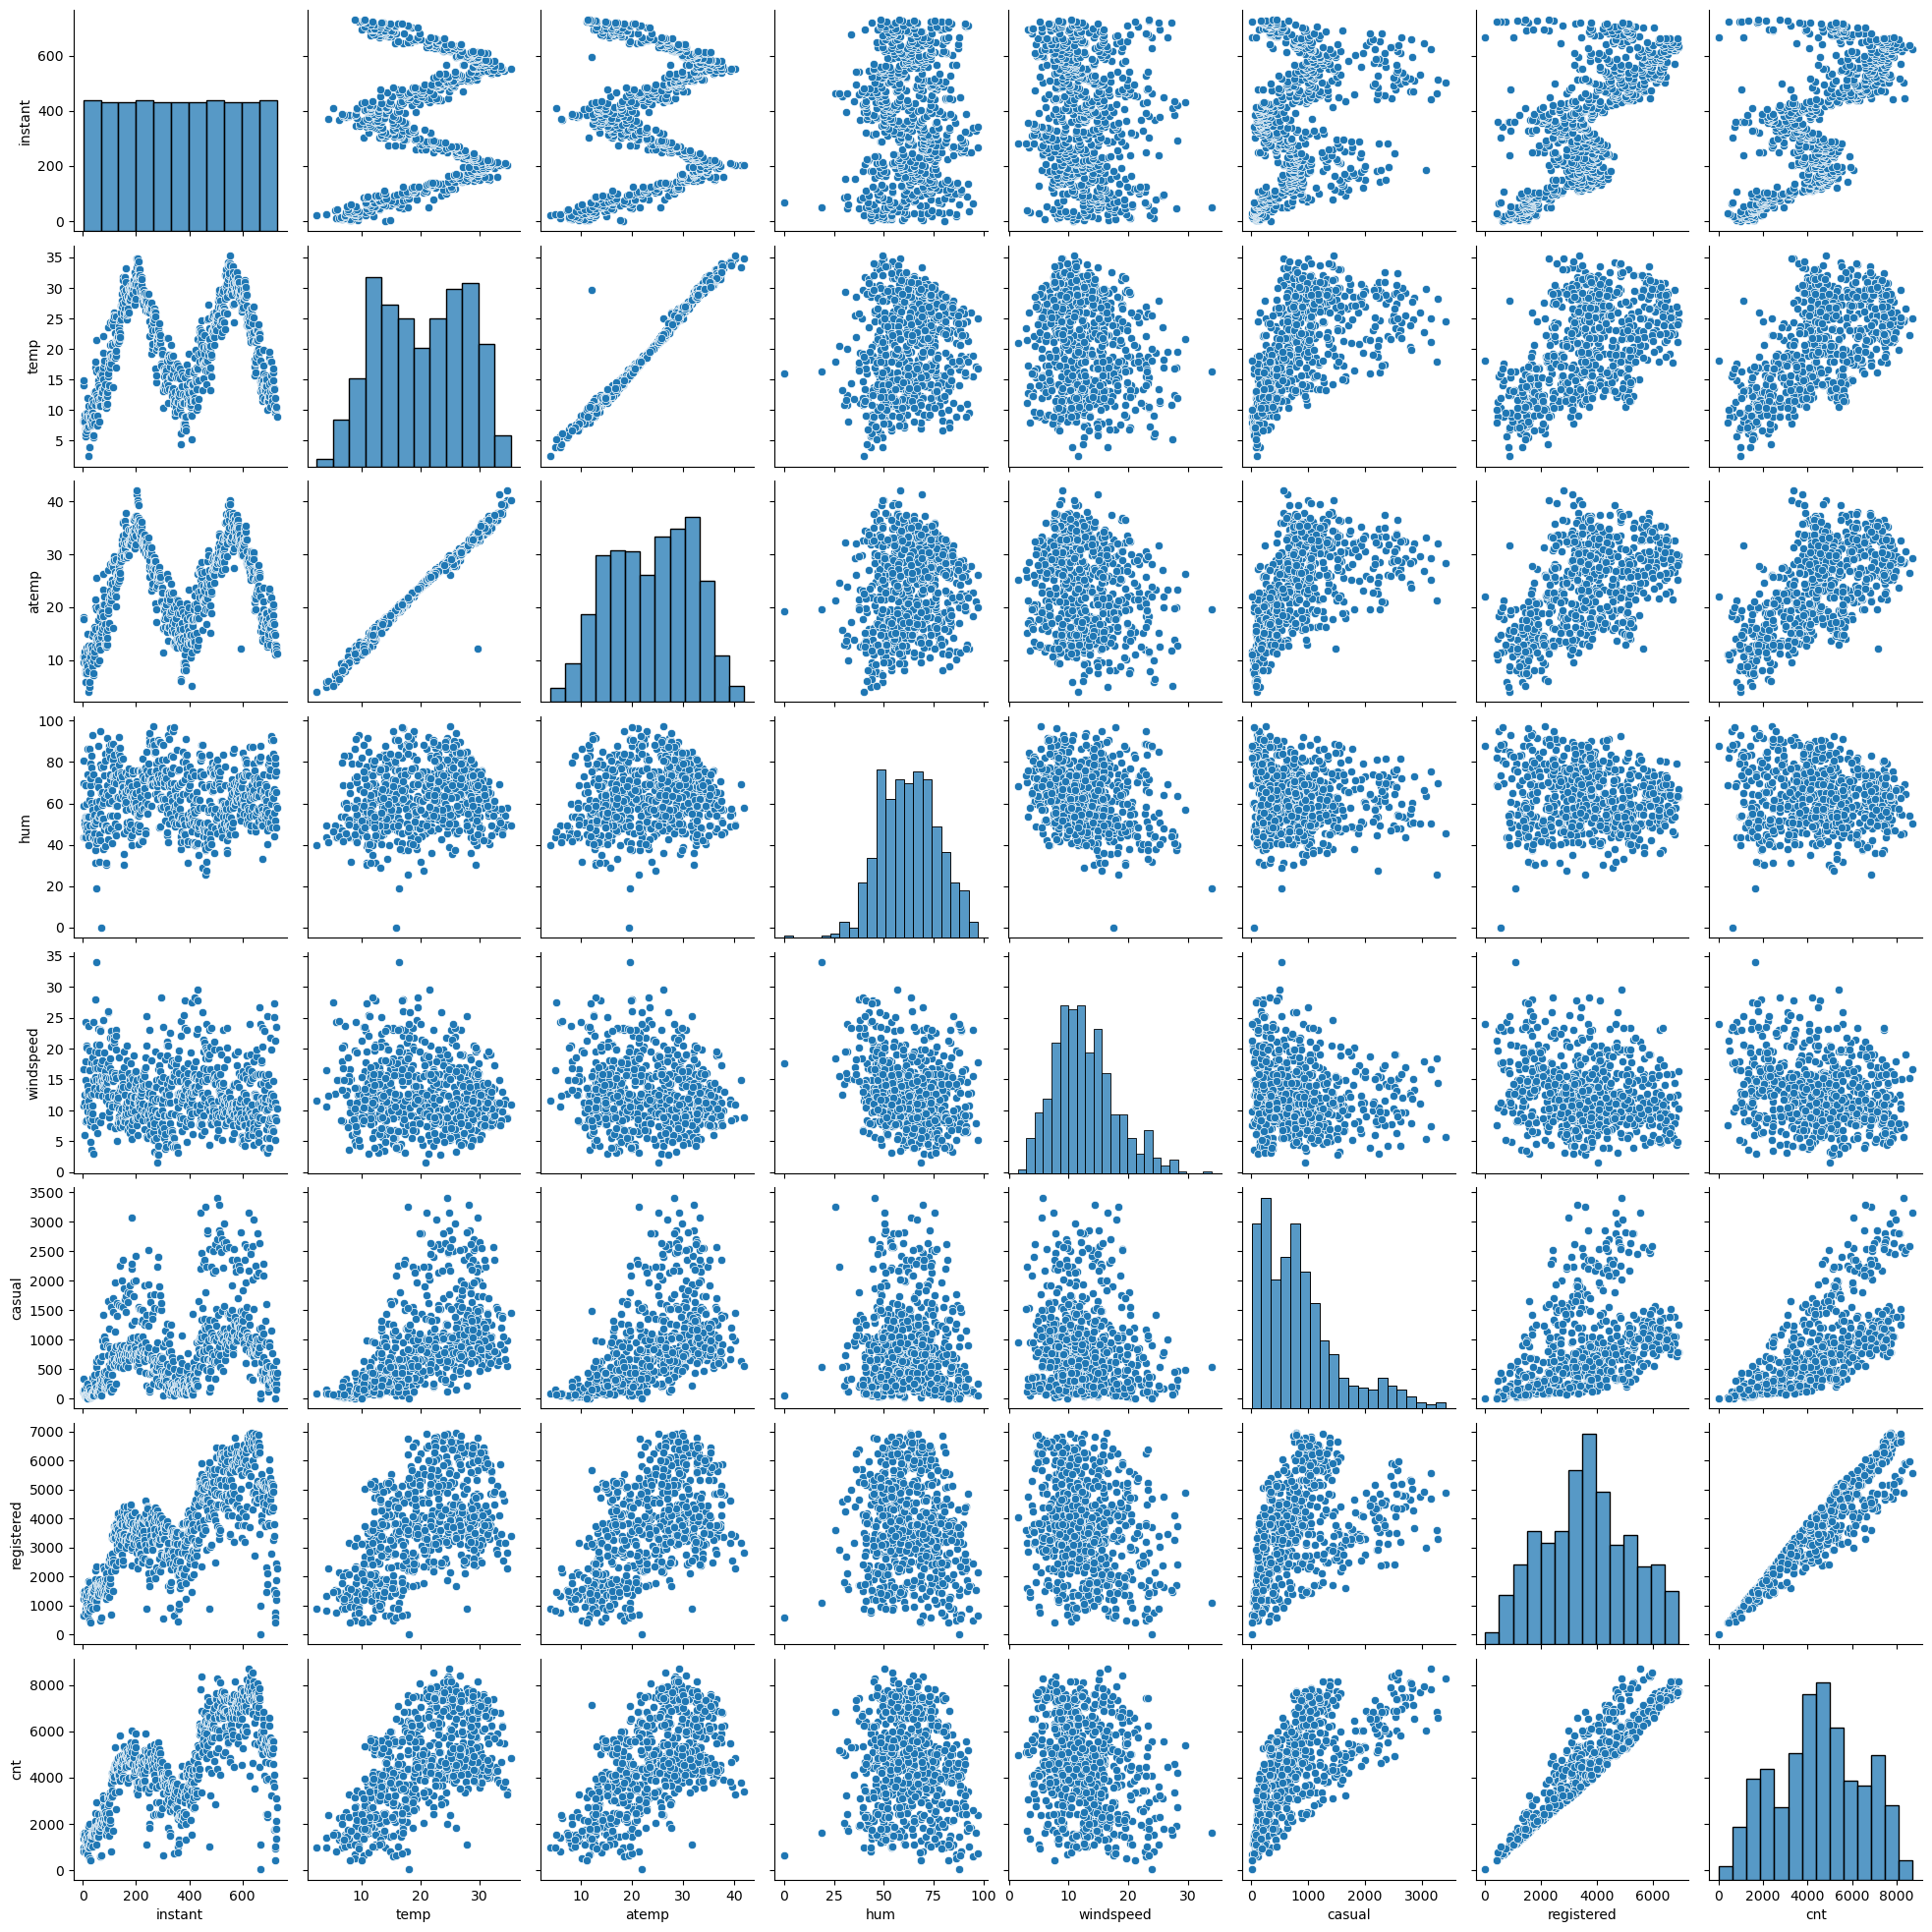

In [412]:
sns.pairplot(bike[num_var])
plt.show()

##### Based on the above graphs there is a strong correlation between cnt and temp, atemp, hum and windspeed.

#### Visualising Categorical Variables.
Visualize the catgorical variables using the box plot.


<Axes: xlabel='yr', ylabel='cnt'>

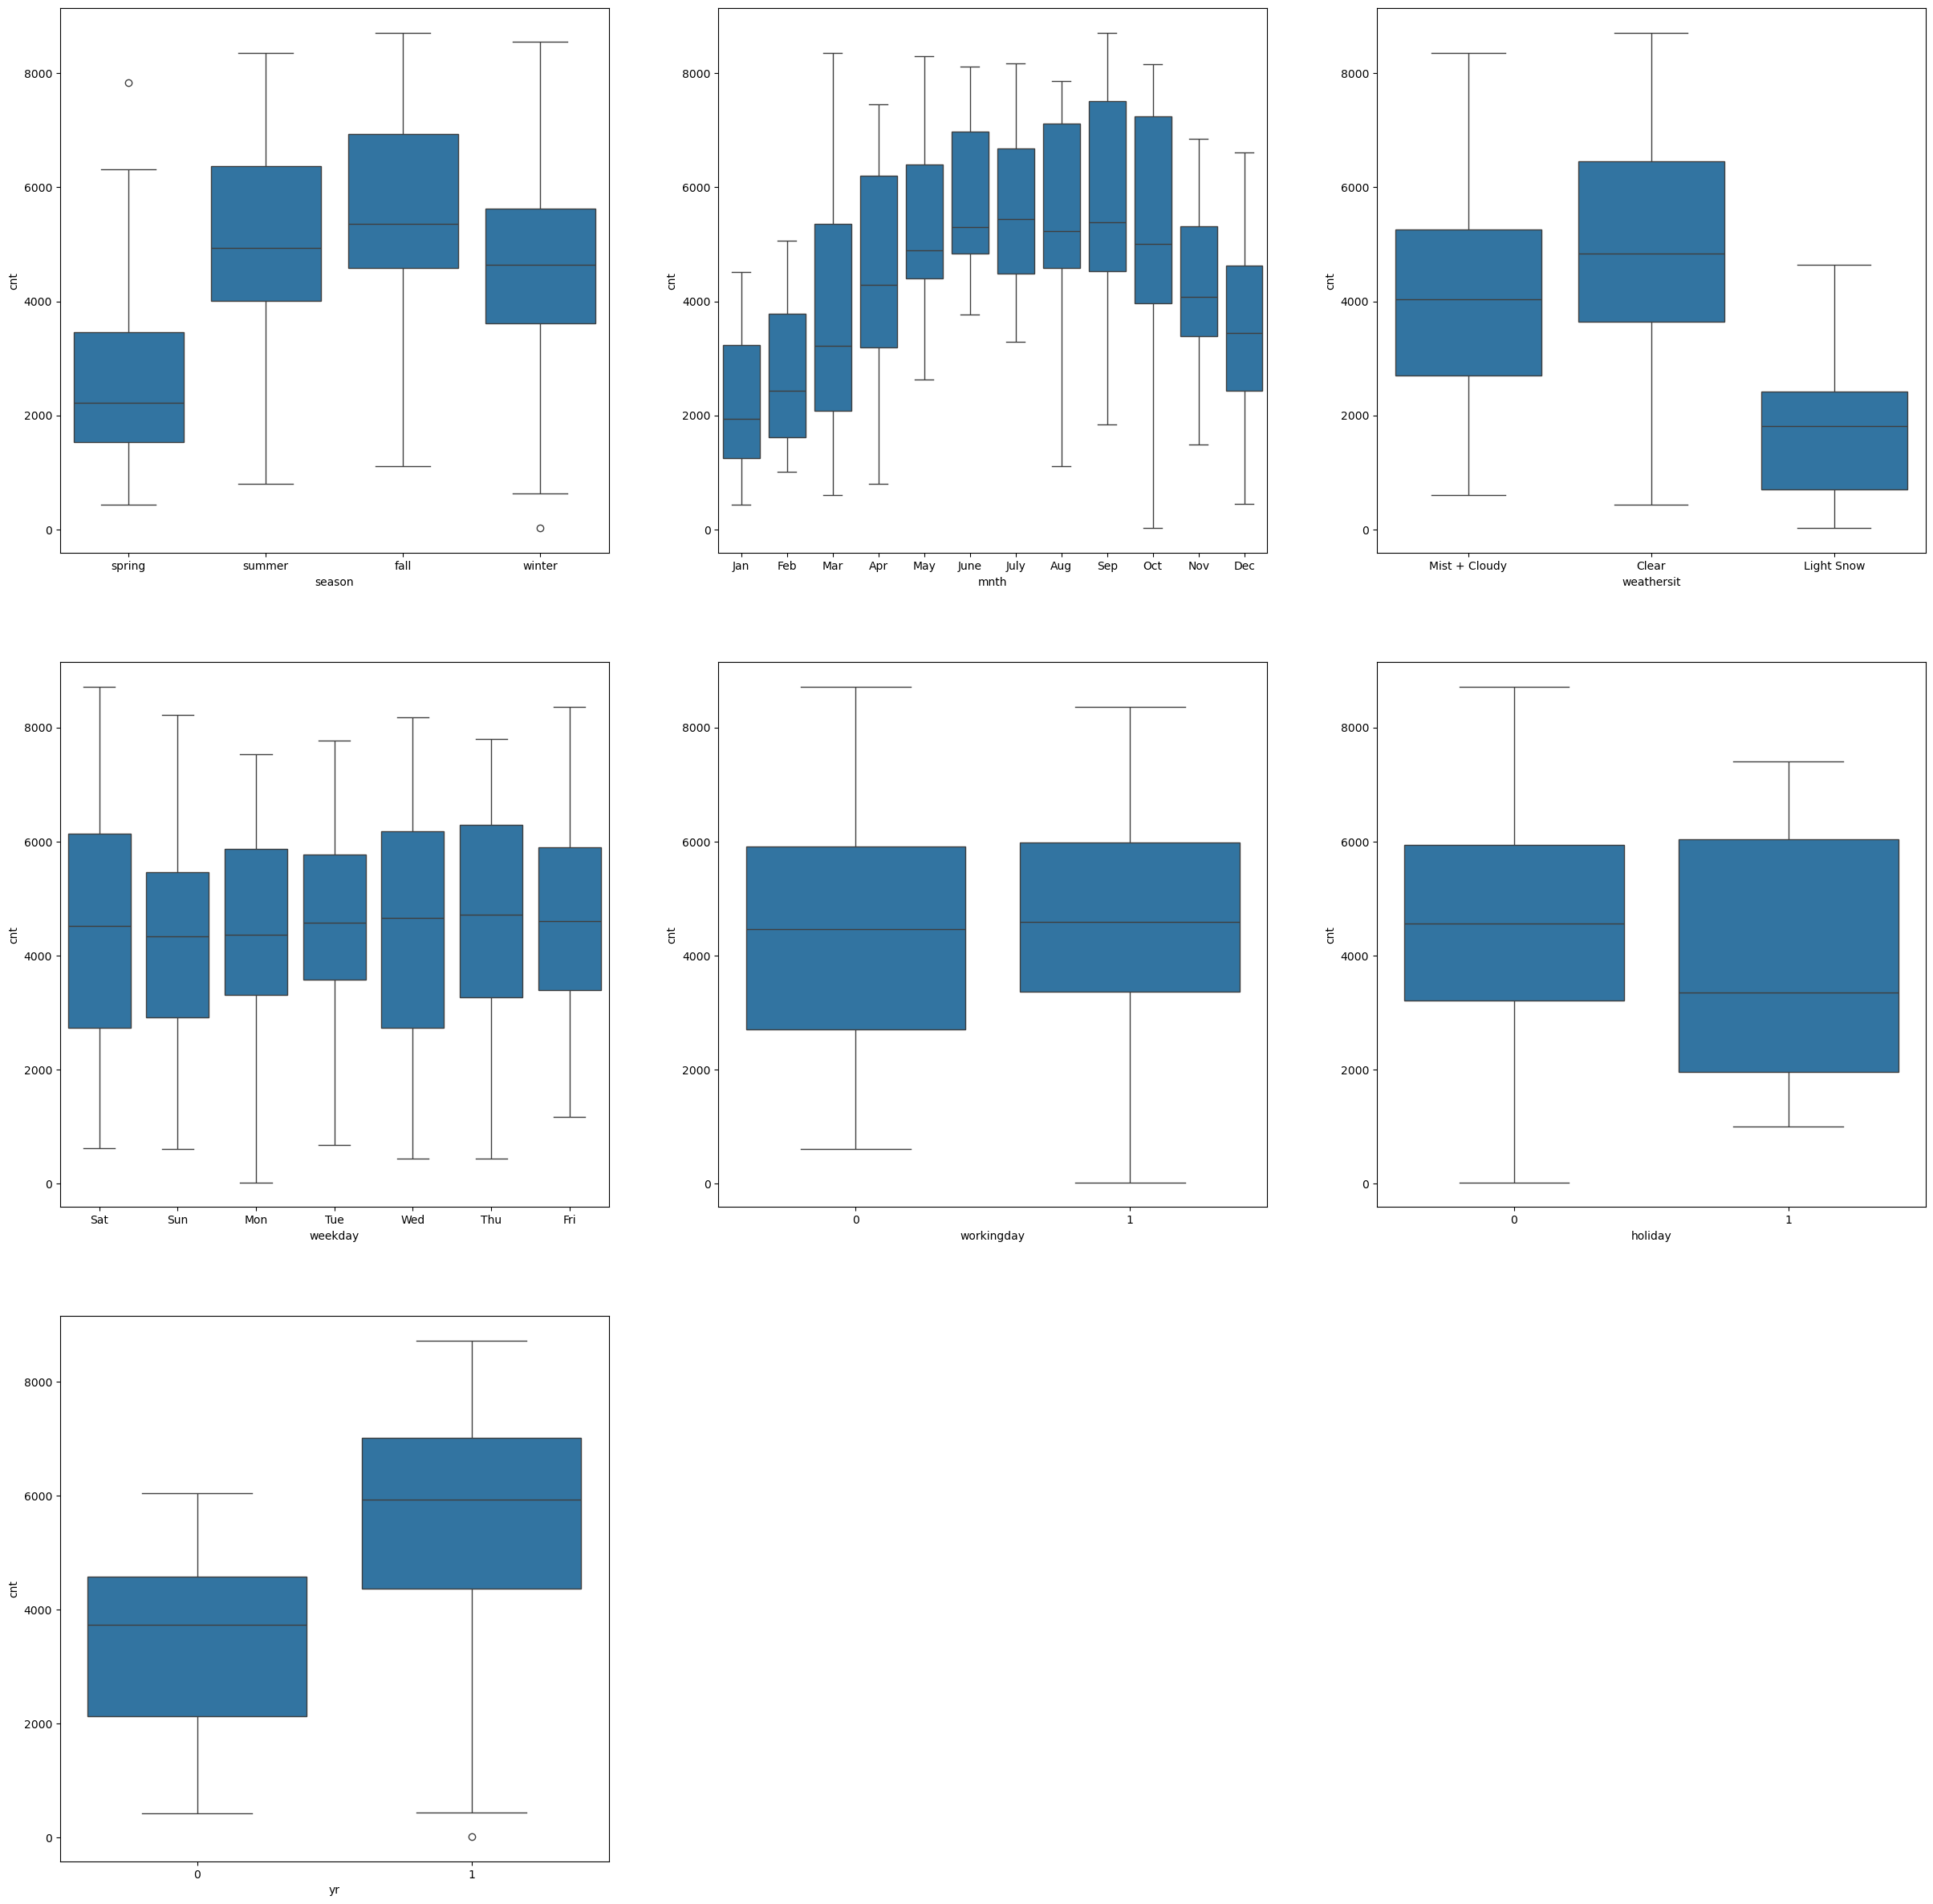

In [413]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike )

plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)


Below observations from the above graphs.

 1. People are renting more times bikes during summer and fall season.
 2. Bike renting are more September and October month.
 3. More bikes are rented in Clear weather condition.
 4. Saturday, Wednesday and Thursdays are more bikes rented.
 5. There is not much difference in the count for the working day or not.
 6. Bike rentals are more in Holidays time.
 7. Bike rentals are increased in year 2019.

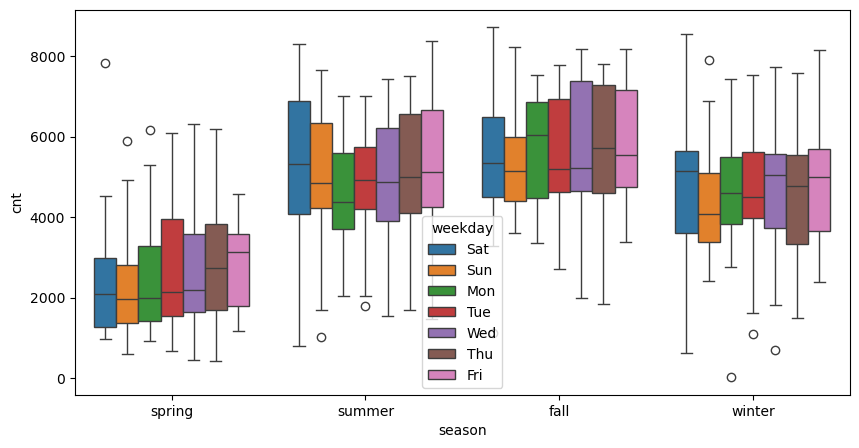

In [414]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weekday', data = bike)
plt.show()

Below observations:
1. During Summer Season - Sat, Thu and fridays are more bike rented.
2. During Fall Season   - Wed, Thu and fridays are more bikes rented

In [415]:
bike = bike.drop(['temp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [416]:
### Dummy Variables
# Get the dummy variables for the feature 'season', 'mnth', 'weekday', weathersit', and store it in a new variables.

season = pd.get_dummies(bike['season'],drop_first=True)
month = pd.get_dummies(bike['mnth'], drop_first=True)
weekday = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)


In [417]:
season = season.astype(int)
month = month.astype(int)
weekday = weekday.astype(int)
weathersit = weathersit.astype(int)

In [418]:
weathersit.head()

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [419]:
# Add the dummy results to the original Bike dataframe

bike = pd.concat([bike, season], axis = 1)
bike = pd.concat([bike, month], axis = 1)
bike = pd.concat([bike, weekday], axis = 1)
bike = pd.concat([bike, weathersit], axis = 1)

In [420]:
# Now let's see the head of our dataframe.

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [421]:
# Drop 'furnishingstatus' as we have created the dummies for it

bike = bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 3: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [422]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [423]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [424]:
### Rescaling the Features 
from sklearn.preprocessing import MinMaxScaler


In [425]:
# Initiate an Object
scaler = MinMaxScaler()

In [426]:
# We have to rescale the below variables as they have large values compare to other variables.
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# scalar to fit.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [427]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [428]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


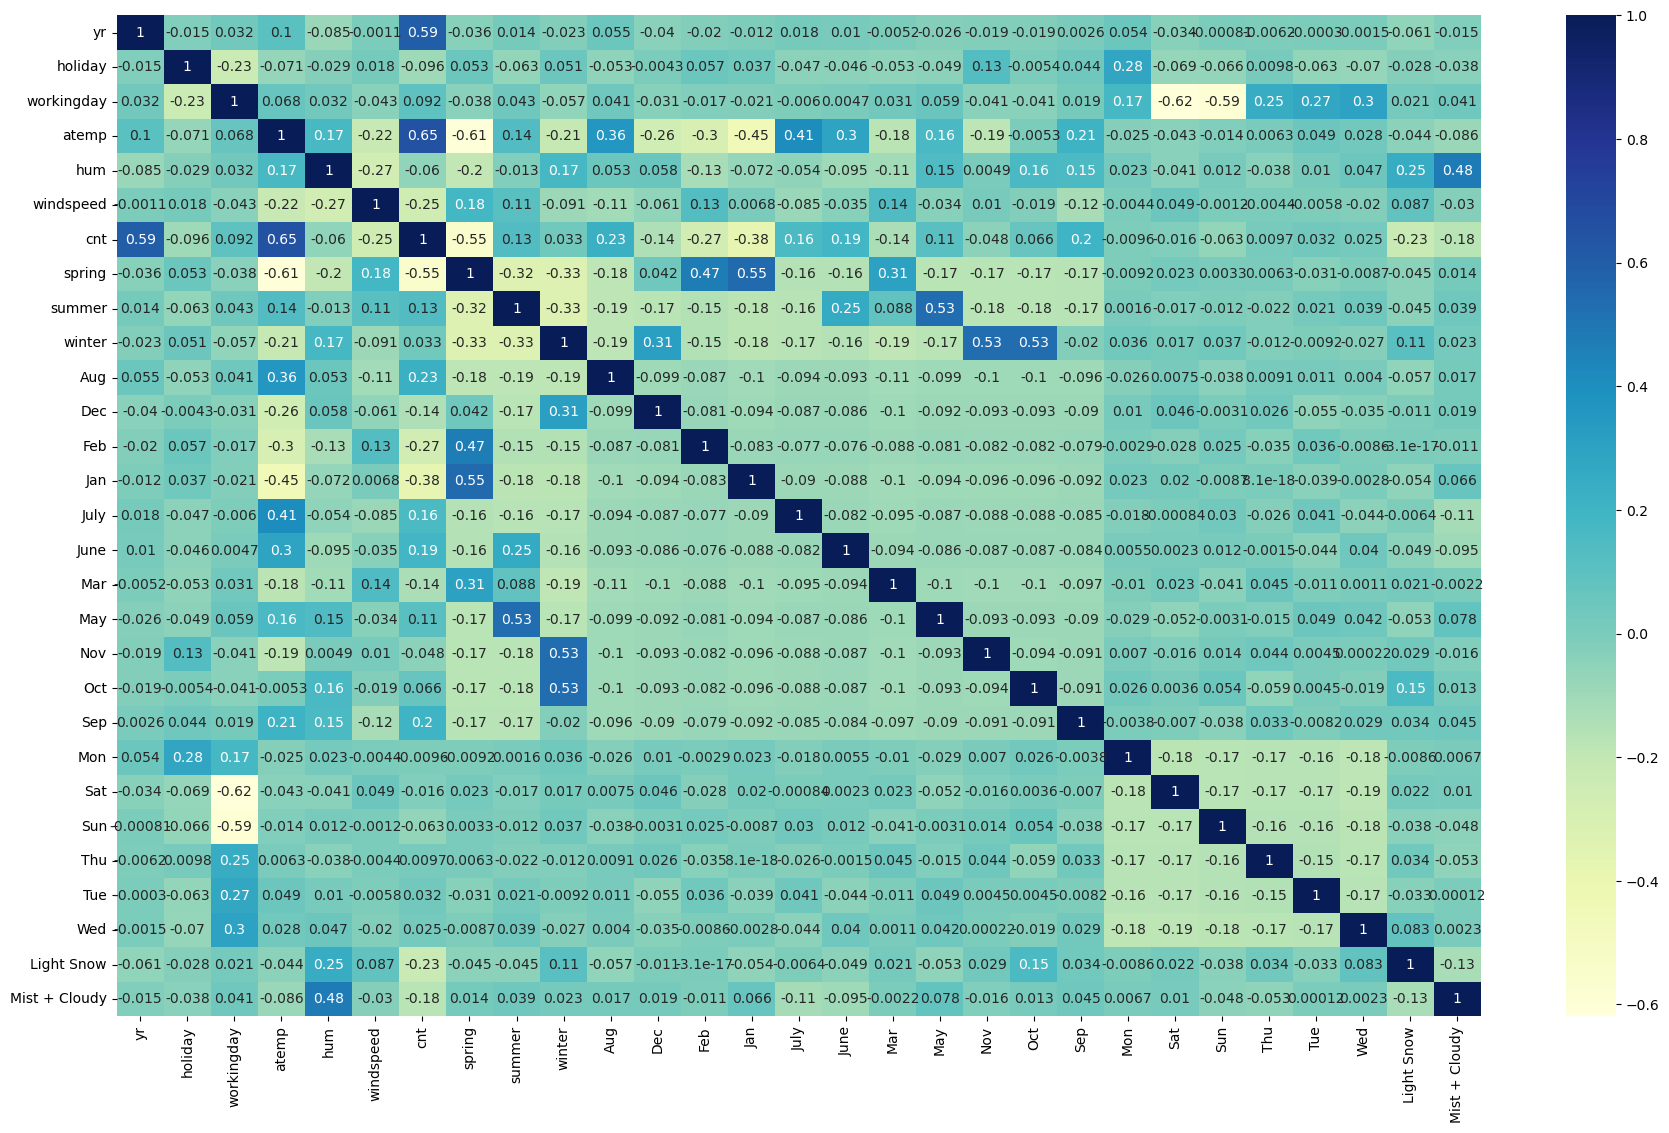

In [429]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22, 13))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

based on above map we see the 'cnt' is most correlated with 'temp' and 'atemp'. Let's see a pairplot for `cnt vs `atemp`.

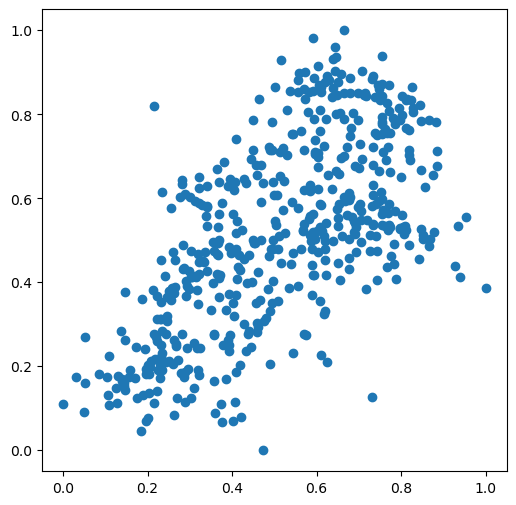

In [430]:
plt.figure(figsize =[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [431]:
y_train = df_train.pop('cnt')
X_train = df_train

In [432]:
#check variables
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [433]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Step 4: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [434]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model

lr = sm.OLS(y_train, X_train_lm).fit() 

In [435]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

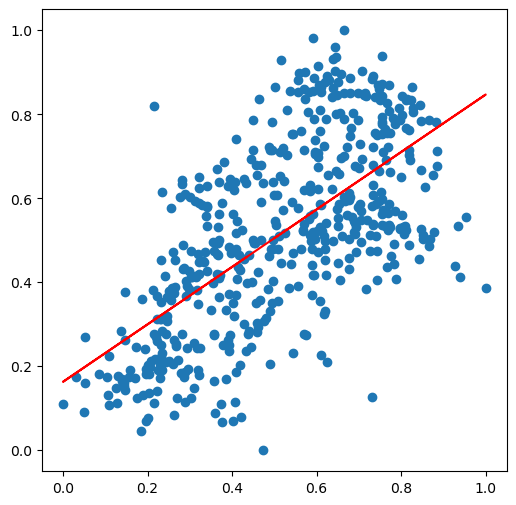

In [436]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize =[6,6])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [437]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.10e-61
Time:                        17:37:09   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`, which means 41.8%  variance of the 'cnt' quantity is explained by 'atemp' variable. 
Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [438]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [439]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sat, 25 May 2024   Prob (F-statistic):          1.07e-131
Time:                        17:37:09   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.696` from `0.418`.
We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [440]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [441]:
#Build a linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.261656
yr               0.234176
holiday          0.021320
workingday       0.101138
atemp            0.419497
hum             -0.145605
windspeed       -0.168583
spring          -0.055055
summer           0.030819
winter           0.099787
Aug              0.036894
Dec             -0.054028
Feb             -0.040490
Jan             -0.073420
July            -0.020120
June             0.017822
Mar             -0.000636
May              0.035849
Nov             -0.047654
Oct              0.007796
Sep              0.091471
Mon             -0.026325
Sat              0.096947
Sun              0.042251
Thu             -0.013201
Tue             -0.022156
Wed             -0.008112
Light Snow      -0.254551
Mist + Cloudy   -0.062605
dtype: float64

In [442]:
#summary of model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 25 May 2024   Prob (F-statistic):          4.12e-180
Time:                        17:37:09   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2617      0.035      7.468      0.000       0.193       0.330
yr                0.2342      0.008     28.937      0.000       0.218       0.250
holiday           0.0213      0.024      0.889      0.374      -0.026       0.068
workingday        0.1011      0.012      8.245      0.000       0.077       0.125
atemp             0.4195      0.045      9.248      0.000       0.330       0.509
hum              -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed        -0.1686      0.026     -6.506      0.000      -0.219      -0.118
spring           -0.0551      0.030     -1.826      0.068      -0.114       0.004
summer            0.0308      0.026      1.171      0.242      -0.021       0.083
winter            0.0998      0.028      3.553      0.000       0.045       0.155
Aug               0.0369      0.033      1.103      0.270      -0.029       0.103
Dec              -0.0540      0.034     -1.603      0.110      -0.120       0.012
Feb              -0.0405      0.033     -1.226      0.221      -0.105       0.024
Jan              -0.0734      0.034     -2.187      0.029      -0.139      -0.007
July             -0.0201      0.035     -0.578      0.563      -0.088       0.048
June              0.0178      0.025      0.726      0.468      -0.030       0.066
Mar              -0.0006      0.025     -0.026      0.979      -0.049       0.048
May               0.0358      0.021      1.716      0.087      -0.005       0.077
Nov              -0.0477      0.037     -1.303      0.193      -0.120       0.024
Oct               0.0078      0.036      0.216      0.829      -0.063       0.079
Sep               0.0915      0.032      2.846      0.005       0.028       0.155
Mon              -0.0263      0.015     -1.707      0.089      -0.057       0.004
Sat               0.0969      0.014      7.000      0.000       0.070       0.124
Sun               0.0423      0.014      3.005      0.003       0.015       0.070
Thu              -0.0132      0.016     -0.843      0.399      -0.044       0.018
Tue              -0.0222      0.016     -1.418      0.157      -0.053       0.009
Wed              -0.0081      0.015     -0.540      0.589      -0.038       0.021
Light Snow       -0.2546      0.027     -9.566      0.000      -0.307      -0.202
Mist + Cloudy    -0.0626      0.011     -5.961      0.000      -0.083      -0.042
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:                       6.142   Cond. No.                     1.29e+16
================================================================

R-Squared is 0.851, which means 85% of the variance of the 'Cnt' is explained by all the variables.

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Dropping the variable and updating the model:

##### We will use the Recursive Feature Elimination(RFE) Automated Approach to drop the variables. This is the optimal feature selection.


In [443]:
# Check all the columns of the dataframe
print(bike.columns)
len(bike.columns)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')


29

In [444]:
#creating the RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

#Setting feature selection variables to 15
n_features_to_select = 15

rfe = RFE(lm, n_features_to_select) 

#fitting rfe object on our bike training dataset

rfe = rfe.fit(X_train, y_train)


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
# Combine feature names, support mask, and rankings into a list of tuples
features_info = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Print the features information
for feature_name, selected, ranking in features_info:
    status = 'Selected' if selected else 'Rejected'
    print(f'Feature: {feature_name}, Status: {status}, Ranking: {ranking}')


In [ ]:
# Get the names of the selected features
true_rfe = X_train.columns[rfe.support_]
true_rfe

### Building a Model with selected columns using the RFE approah.


In [ ]:
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [ ]:
#Build a linear model

X_train_lm_rfe = sm.add_constant(X_train_rfe)

lr_model = sm.OLS(y_train, X_train_lm_rfe).fit()

lr_model.params

In [ ]:
#summary of the model
lr_model.summary()

#### validate the mode using the VIF values.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe.columns

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model:


below approach followed:

- High p-value, high VIF : definitely drop
- High-Low:

     1) High p, low VIF : remove these first, then build model again and check VIF again      
     2) Low p, high VIF : remove these later          
- Low p-value, low VIF : keep variables

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, "hum" as it has a very high VIF  25.08. Let's go ahead and drop this variables.

In [ ]:
# 'hum' variable is high VIF and drop the same

X_train_lr2 = X_train_rfe.drop('hum', axis=1)

In [ ]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_lr2)

# fit
lr_2 = sm.OLS(y_train, X_train_lm).fit()

#parms
lr_2.params

In [ ]:
# Print the summary of the model
print(lr_2.summary())

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lr2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Dropping the next Variable and Updating the Model

As we see variable 'sat' s having the high p-value. Let's drop it.


In [ ]:
# Drop the variable 'sat'
X_train_lr3 = X_train_lr2.drop(['Sat'], axis = 1)

In [ ]:
# Build a fourth  fitted model
X_train_lm = sm.add_constant(X_train_lr3)

# fit
lr_3 = sm.OLS(y_train, X_train_lm).fit()

#parms
lr_3.params

In [467]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.95e-185
Time:                        06:46:56   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2931      0.026     11.396

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lr3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data
##### Below points are analysed to decide the model is best fit or not:

The model p-value, the VIF and the R-squared value. 
The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. 


1. The low p-vaue or p <0.05 of the selected variables. 
2. The VIF value should be <5 . We achieved the both parameters in the above model.
3. The R-squared value is 83.6% , which tells the high correlation between the dependent variable (cnt) and the independent variables.
   The selected variables helps us to map the variance of the dependent variables 'cnt'

In [445]:
# Add constant to X_train_lr3

X_train_lr3 = sm.add_constant(X_train_lr3)
#X_train_lm5.columns
X_train_lr3

,const,yr,holiday,atemp,windspeed,spring,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,0,0,0,0,0,0,0,0,1
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.431816,0,1,1,0,0,0,0,0,1


In [446]:
y_train_pred = lr_3.predict(X_train_lr3)

Text(0.5, 1.0, 'Error distribution')

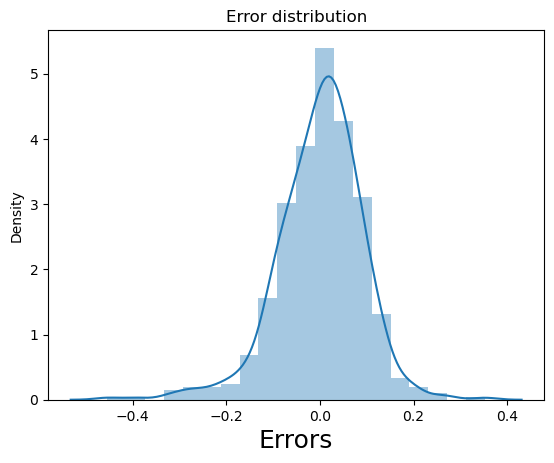

In [447]:
# Plot the histogram of the error terms
res = y_train - y_train_pred

sns.distplot(res, bins = 20)
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.title('Error distribution')

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [448]:
df_test.head()
num_vars

['atemp', 'hum', 'windspeed', 'cnt']

In [449]:
#### Applying the scaling on the test sets

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [450]:
#### Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [451]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [452]:
X_train_lr3.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter',
       'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [456]:
#dropping constant
X_train_lr3.drop(columns= 'const', inplace = True)

In [457]:
X_test_m3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [458]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr3.columns]

In [459]:
X_test_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Dec', 'Jan',
       'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [460]:
#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [461]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter',
       'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [462]:
# Making predictions using the third model

y_pred_m3 = lr_3.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

##### We can now validate the assumptions of linear regression in the model:

As we can see, temperature has a linear relationship with the dependent variable (cnt). 

As we have observed earlier every variable in our chosen model has a VIF < 5,  which ensures that there is no mulitcollinearity. 

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression. 

## Step 9: Prediction and Evaluation of the test set using r2_score

In [463]:
# r2 score of the test set
r2_test = r2_score(y_true= y_test, y_pred = y_pred_m3)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8179669424739718


In [464]:
# r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8359991965394293


Text(0, 0.5, 'y_pred')

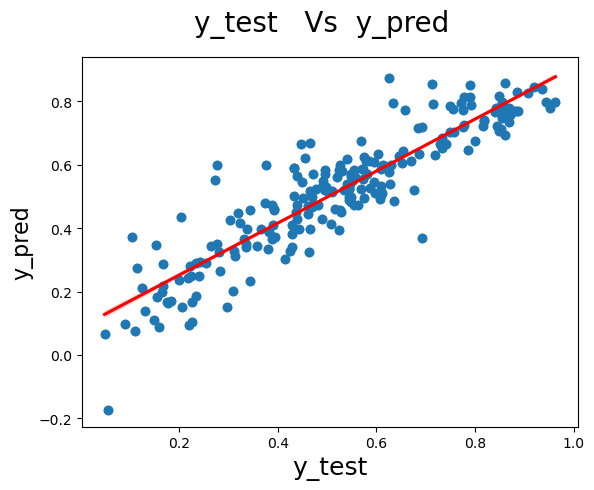

In [465]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x= y_test, y= y_pred_m3, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test   Vs  y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.236  \times  yr -0.088 0.202  \times  holiday + 0.412 \times temp - 0.142 \times windspeed -0.11 \times spring + 0.058 \times winter - 0.053 \times Dec - 0.056 \times Jan - 0.06 \times July - 0.05 \times Nov + 0.056 \times Sept - 0.29 \times Light Snow - 0.082 \times Mist+Cloudy$

In [466]:
# Calculate the the MSE (Mean Squared Error)

train_MSE = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_MSE  = (mean_squared_error(y_true=y_test, y_pred=y_pred_m3))
print('Mean squared error of the train set is', train_MSE)
print('Mean squared error of the test set is', train_MSE)

Mean squared error of the train set is 0.008256279849003385
Mean squared error of the test set is 0.008256279849003385


Our models MSE is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets.

### Summary of th Model:

The summary of this model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows.

1) The R-squared value of the train set is 83.6% , whereas the test set has a value of 81.8%. Which suggests that our model explains the variance quite accurately on the test set and thus we can conclude that it is a best fit good model.

2) Our developed model's MSE(Mean Squared Error) is almost 0 for both the train and test datasets which suggests that the variance is accurately predicted on the test set. 

3) The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  

3) We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. 
 Also the more bike rentals are demanded on the winters as compared to the summer and spring. 
 
 We had observed that the September month had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on working day. 

4) These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. 

  One of the recommendations based on this model are that there should be more marketing required in the summer and spring season to drive up rentals. 

  Also Business has to introduce the incentives or any deals on the days the weather is less clear.
  
  There are more Rentals in 2019 than 2018,  which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeated customers.
